#Bilogical response
###1. Loading data + cleaning 
###2. EDA
###3. Splitting data
###4. Fitting model + testing model

In [27]:
from sklearn import model_selection, ensemble, metrics
import pandas as pd
import numpy as np
import xgboost as xgb

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Loading data + processing

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
bioresp = pd.read_csv("/content/gdrive/MyDrive/Data_files/Biological_Response/train.csv")
print(bioresp.shape)
bioresp.head()

(3751, 1777)


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
bioresp_1 = bioresp.iloc[:, :10]
print(f"bioresp_1 shape: {bioresp_1.shape}")
bioresp_1.head(5)

bioresp_1 shape: (3751, 10)


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646


In [9]:
bioresp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Activity  3751 non-null   int64  
 1   D1        3751 non-null   float64
 2   D2        3751 non-null   float64
 3   D3        3751 non-null   float64
 4   D4        3751 non-null   float64
 5   D5        3751 non-null   float64
 6   D6        3751 non-null   float64
 7   D7        3751 non-null   float64
 8   D8        3751 non-null   float64
 9   D9        3751 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 293.2 KB


In [11]:
bioresp_1.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000


In [17]:
if (bioresp_1.dropna(axis=0).shape[0] - bioresp_1.shape[0] == 0):
    print("No rows with missing values")

No rows with missing values


In [21]:
bioresp_1.all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
3746    False
3747    False
3748    False
3749    False
3750    False
Length: 3751, dtype: bool

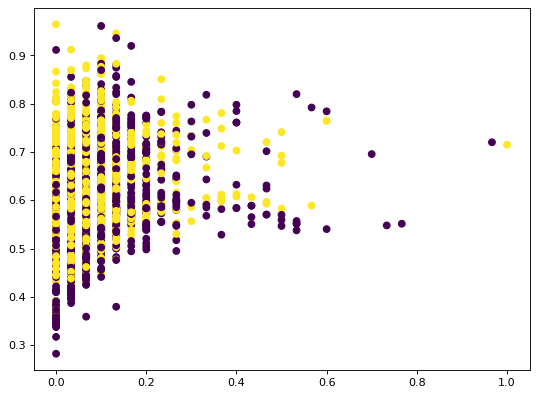

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(bioresp_1["D1"], bioresp_1["D2"], c = bioresp_1['Activity'])
plt.show()

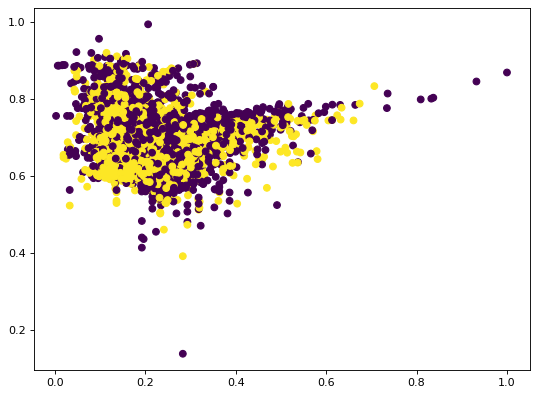

In [37]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(bioresp_1["D5"], bioresp_1["D6"], c = bioresp_1['Activity'])
plt.show()

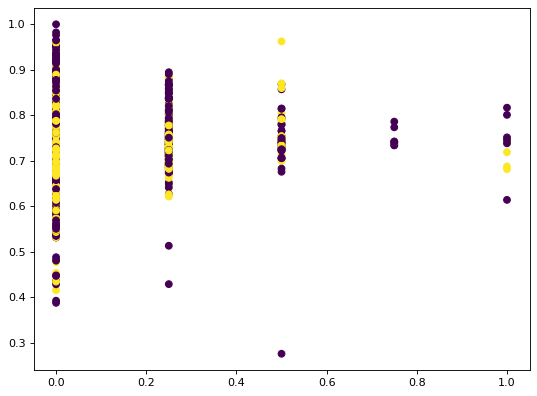

In [38]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(bioresp_1["D4"], bioresp_1["D9"], c = bioresp_1['Activity'])
plt.show()

### GradirntBoosting model

In [ ]:
n_trees = [1] + list(range(10, 55, 5)) 
n_trees

[1, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [ ]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)  # GBM
    score = model_selection.cross_val_score(estimator, bioresp_data, bioresp_labels, 
                                             scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 1min 38s, sys: 184 ms, total: 1min 38s
Wall time: 1min 38s


In [ ]:
xgb_scoring

matrix([[0.76498801, 0.756     , 0.756     ],
        [0.77617906, 0.7752    , 0.7688    ],
        [0.77857714, 0.7744    , 0.7768    ],
        [0.7873701 , 0.7784    , 0.7768    ],
        [0.79216627, 0.7736    , 0.7832    ],
        [0.79776179, 0.7776    , 0.7824    ],
        [0.79616307, 0.7816    , 0.78      ],
        [0.79296563, 0.7848    , 0.7792    ],
        [0.79856115, 0.7832    , 0.7808    ],
        [0.79936051, 0.7832    , 0.7832    ]])

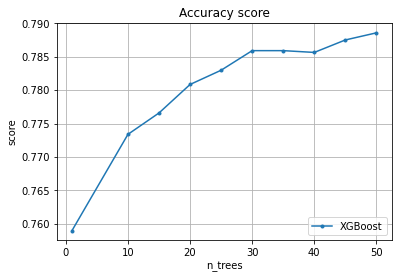

In [ ]:
#pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')
plt.show()

### RandomForest model

In [ ]:
%%time
rf_scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(max_depth=10, n_estimators=n_tree, random_state=48)  # RandomForest
    score = model_selection.cross_val_score(estimator, bioresp_data, bioresp_labels, 
                                             scoring = 'accuracy', cv = 3)    
    rf_scoring.append(score)
rf_scoring = np.asmatrix(rf_scoring)

CPU times: user 9.6 s, sys: 50.9 ms, total: 9.66 s
Wall time: 9.65 s


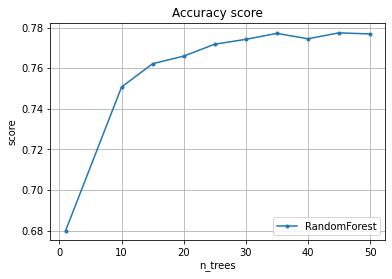

In [ ]:
pylab.plot(n_trees, rf_scoring.mean(axis = 1), marker='.', label='RandomForest')
#pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')
plt.show()

### GradientBoosting + learning_curve

In [ ]:
gb1 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=50, min_child_weight=3)

train_sizes, train_scores, test_scores = model_selection.learning_curve(gb1, bioresp_data, bioresp_labels, train_sizes=[0.1, 0.3, 0.5, 1], cv=3,
                                                                        scoring='accuracy')

In [ ]:
print(train_sizes)
print(train_scores)
print(test_scores)

[ 250  750 1250 2500]
[[0.996      1.         1.        ]
 [0.98       0.96666667 0.96666667]
 [0.9504     0.9384     0.9352    ]
 [0.902      0.904      0.908     ]]
[[0.73780975 0.6896     0.7128    ]
 [0.76338929 0.7504     0.756     ]
 [0.75539568 0.7832     0.7848    ]
 [0.79936051 0.784      0.7856    ]]


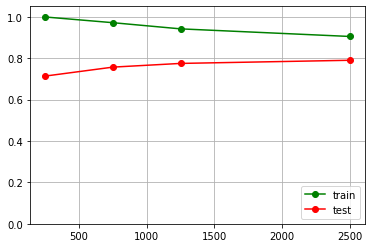

In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
plt.show()

### RandomForest + learning_curve

In [ ]:
rf1 = ensemble.RandomForestClassifier(max_depth=10, n_estimators=150, random_state=48)

train_sizes, train_scores, test_scores = model_selection.learning_curve(rf1, bioresp_data, bioresp_labels, train_sizes=[0.1, 0.3, 0.5, 1], cv=3,
                                                                        scoring='accuracy')

In [ ]:
print(train_sizes)
print(train_scores)
print(test_scores)

[ 250  750 1250 2500]
[[1.     1.     1.    ]
 [0.988  0.988  0.988 ]
 [0.9704 0.9712 0.972 ]
 [0.938  0.9372 0.9408]]
[[0.68505196 0.6584     0.672     ]
 [0.74100719 0.7352     0.7352    ]
 [0.75939249 0.7592     0.772     ]
 [0.79536371 0.7784     0.7928    ]]


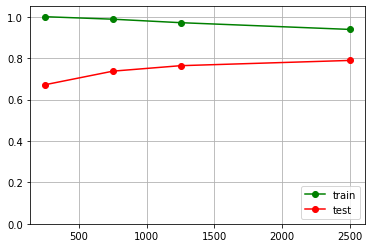

In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')
plt.show()